In [123]:
from tabulate import tabulate
member_name = [
    ["LY Chhaythean", "Male", "I3-AMS", "e20220963"],
    ["LY Chungheang", "Male", "I3-AMS", " e20220980"],
    ["LUN Rathana", "Female", "I3-AMS", "e20220368"],
    ["MON Sreylin", "Female", "I3-AMS", "e20221701"],
    ["MIN Sivee", "Female", "I3-AMS", "e20220283"],
    ["MONY Sothyra", "Female", "I3-AMS", "e20220229"]
]
member_info = ["Name", "Gender", "Program", "ID"]
print("Group 2:")
print(tabulate(member_name, headers=member_info, tablefmt="fancy_grid"))

Group 2:
╒═══════════════╤══════════╤═══════════╤═══════════╕
│ Name          │ Gender   │ Program   │ ID        │
╞═══════════════╪══════════╪═══════════╪═══════════╡
│ LY Chhaythean │ Male     │ I3-AMS    │ e20220963 │
├───────────────┼──────────┼───────────┼───────────┤
│ LY Chungheang │ Male     │ I3-AMS    │ e20220980 │
├───────────────┼──────────┼───────────┼───────────┤
│ LUN Rathana   │ Female   │ I3-AMS    │ e20220368 │
├───────────────┼──────────┼───────────┼───────────┤
│ MON Sreylin   │ Female   │ I3-AMS    │ e20221701 │
├───────────────┼──────────┼───────────┼───────────┤
│ MIN Sivee     │ Female   │ I3-AMS    │ e20220283 │
├───────────────┼──────────┼───────────┼───────────┤
│ MONY Sothyra  │ Female   │ I3-AMS    │ e20220229 │
╘═══════════════╧══════════╧═══════════╧═══════════╛


$\textbf{Exploration The Data}$

$\text{Import the Important Libraries}$

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [91]:
data = pd.read_csv("D:\Self Taught\Machine Learning\Linear_Regression\housing.csv")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\chhay\AppData\Local\Temp\ipykernel_64120\4020103895.py:1: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_csv("D:\Self Taught\Machine Learning\Linear_Regression\housing.csv")


In [92]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


$\text{Now we are going to choose Median House Value as the Target variable}$

$\text{The other variables use it as the input variables to predict the house price}$

$\textbf{ For the ocean proximity}$

$\text{There is nothing for us to do with it so, we handle it out}$

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
data.dropna(inplace=True)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [96]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [97]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

In [98]:
print(y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
235,-122.20,37.79,35.0,1802.0,459.0,1009.0,390.0,2.3036,NEAR BAY,126000.0
20493,-118.65,34.27,23.0,1724.0,265.0,934.0,306.0,6.0783,<1H OCEAN,229200.0
9174,-118.52,34.39,21.0,5477.0,1275.0,3384.0,1222.0,3.6625,<1H OCEAN,228100.0
1374,-122.12,38.01,50.0,1300.0,263.0,691.0,239.0,3.9519,NEAR BAY,126500.0
9596,-120.45,37.31,20.0,4379.0,753.0,2055.0,716.0,3.7652,INLAND,133500.0
...,...,...,...,...,...,...,...,...,...,...
12355,-116.54,33.80,22.0,6050.0,1387.0,1432.0,890.0,2.2216,INLAND,183900.0
5351,-118.40,34.04,40.0,2079.0,268.0,720.0,282.0,9.2720,<1H OCEAN,500001.0
11515,-118.09,33.71,19.0,1397.0,271.0,491.0,197.0,8.7397,NEAR OCEAN,500001.0
16981,-122.29,37.56,34.0,1693.0,281.0,846.0,291.0,5.3683,NEAR BAY,339400.0


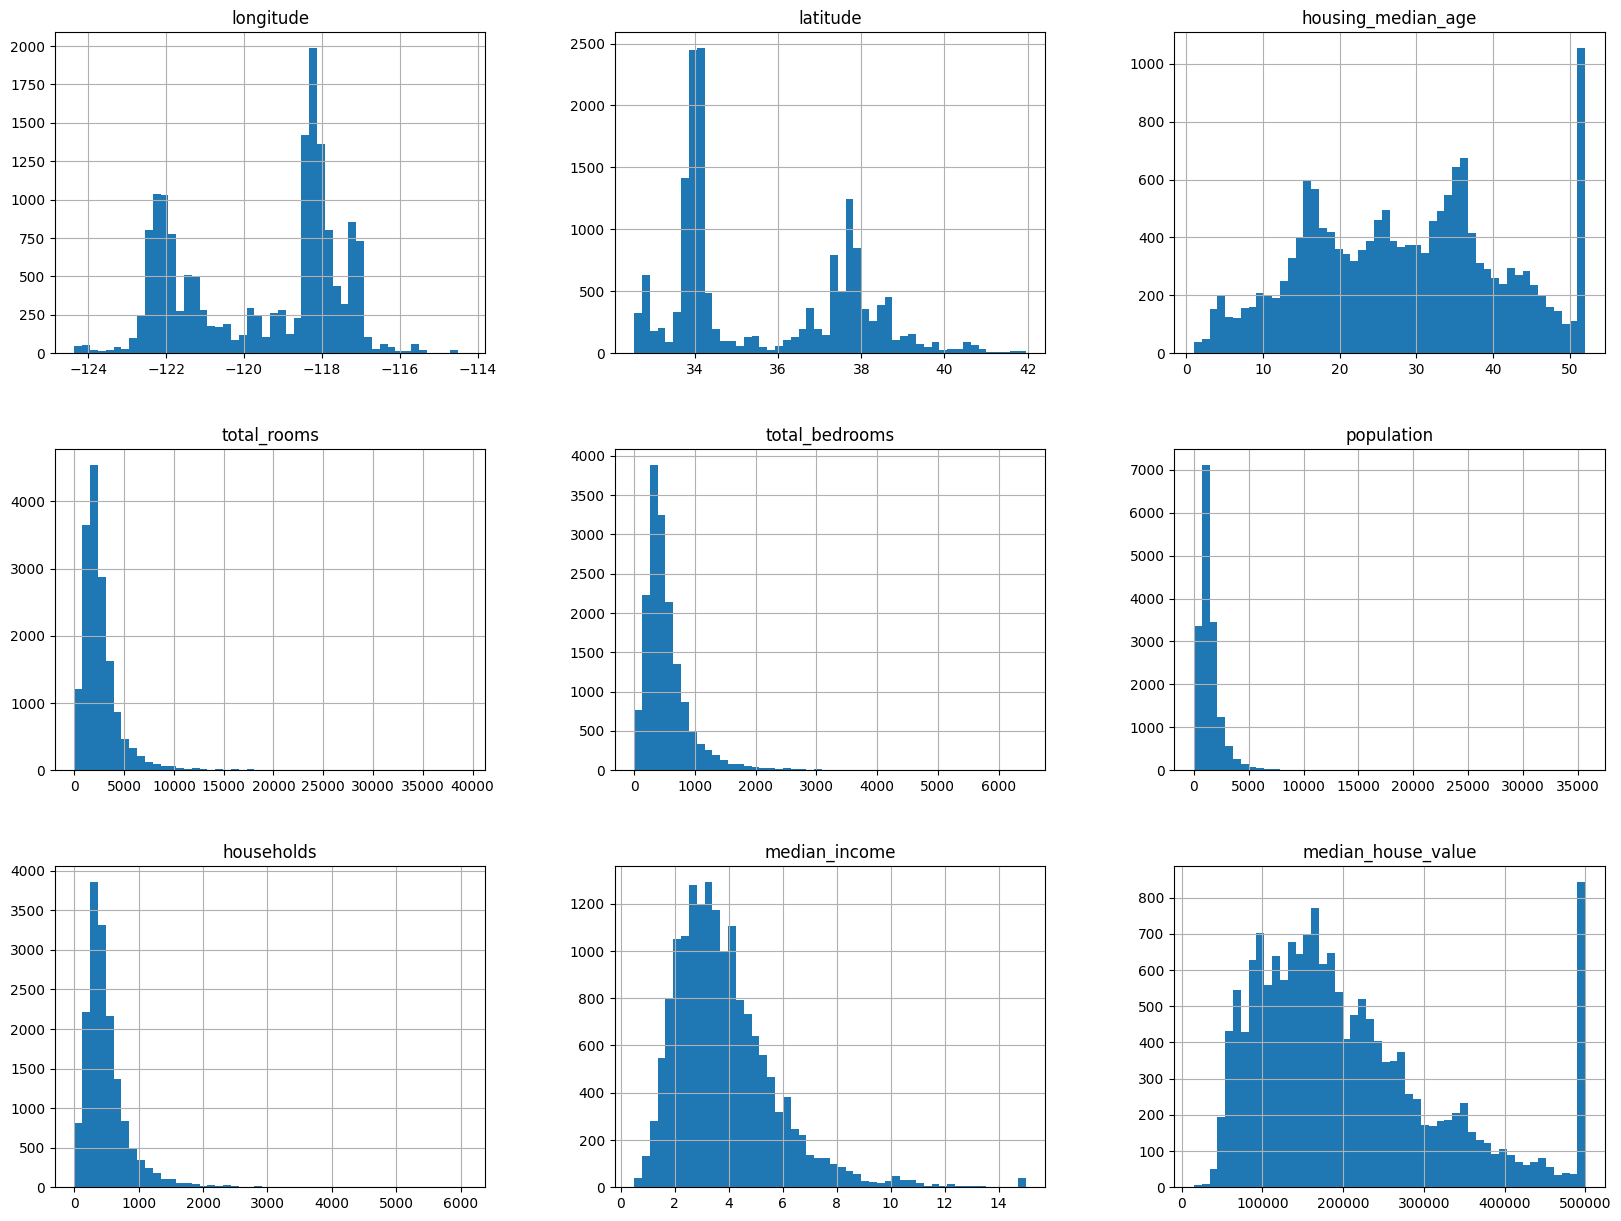

In [101]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [102]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.564750,35.624165,28.710388,2625.317264,536.248134,1419.888352,498.111159,3.876673,207366.602839
std,2.003761,2.133493,12.573457,2198.690471,426.000240,1146.330369,386.373460,1.910431,115976.372499
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1446.000000,295.000000,783.000000,279.000000,2.565300,119825.000000
50%,-118.490000,34.250000,29.000000,2112.000000,433.000000,1164.000000,408.000000,3.534700,179800.000000
75%,-118.010000,37.710000,37.000000,3138.750000,644.000000,1718.750000,602.000000,4.750000,265600.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [103]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7246
INLAND        5168
NEAR OCEAN    2123
NEAR BAY      1805
ISLAND           4
Name: count, dtype: int64

In [104]:
pd.get_dummies(train_data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
235,0,0,0,1,0
20493,1,0,0,0,0
9174,1,0,0,0,0
1374,0,0,0,1,0
9596,0,1,0,0,0
...,...,...,...,...,...
12355,0,1,0,0,0
5351,1,0,0,0,0
11515,0,0,0,0,1
16981,0,0,0,1,0


In [105]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop('ocean_proximity', axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
235,-122.20,37.79,35.0,1802.0,459.0,1009.0,390.0,2.3036,126000.0,0,0,0,1,0
20493,-118.65,34.27,23.0,1724.0,265.0,934.0,306.0,6.0783,229200.0,1,0,0,0,0
9174,-118.52,34.39,21.0,5477.0,1275.0,3384.0,1222.0,3.6625,228100.0,1,0,0,0,0
1374,-122.12,38.01,50.0,1300.0,263.0,691.0,239.0,3.9519,126500.0,0,0,0,1,0
9596,-120.45,37.31,20.0,4379.0,753.0,2055.0,716.0,3.7652,133500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12355,-116.54,33.80,22.0,6050.0,1387.0,1432.0,890.0,2.2216,183900.0,0,1,0,0,0
5351,-118.40,34.04,40.0,2079.0,268.0,720.0,282.0,9.2720,500001.0,1,0,0,0,0
11515,-118.09,33.71,19.0,1397.0,271.0,491.0,197.0,8.7397,500001.0,0,0,0,0,1
16981,-122.29,37.56,34.0,1693.0,281.0,846.0,291.0,5.3683,339400.0,0,0,0,1,0


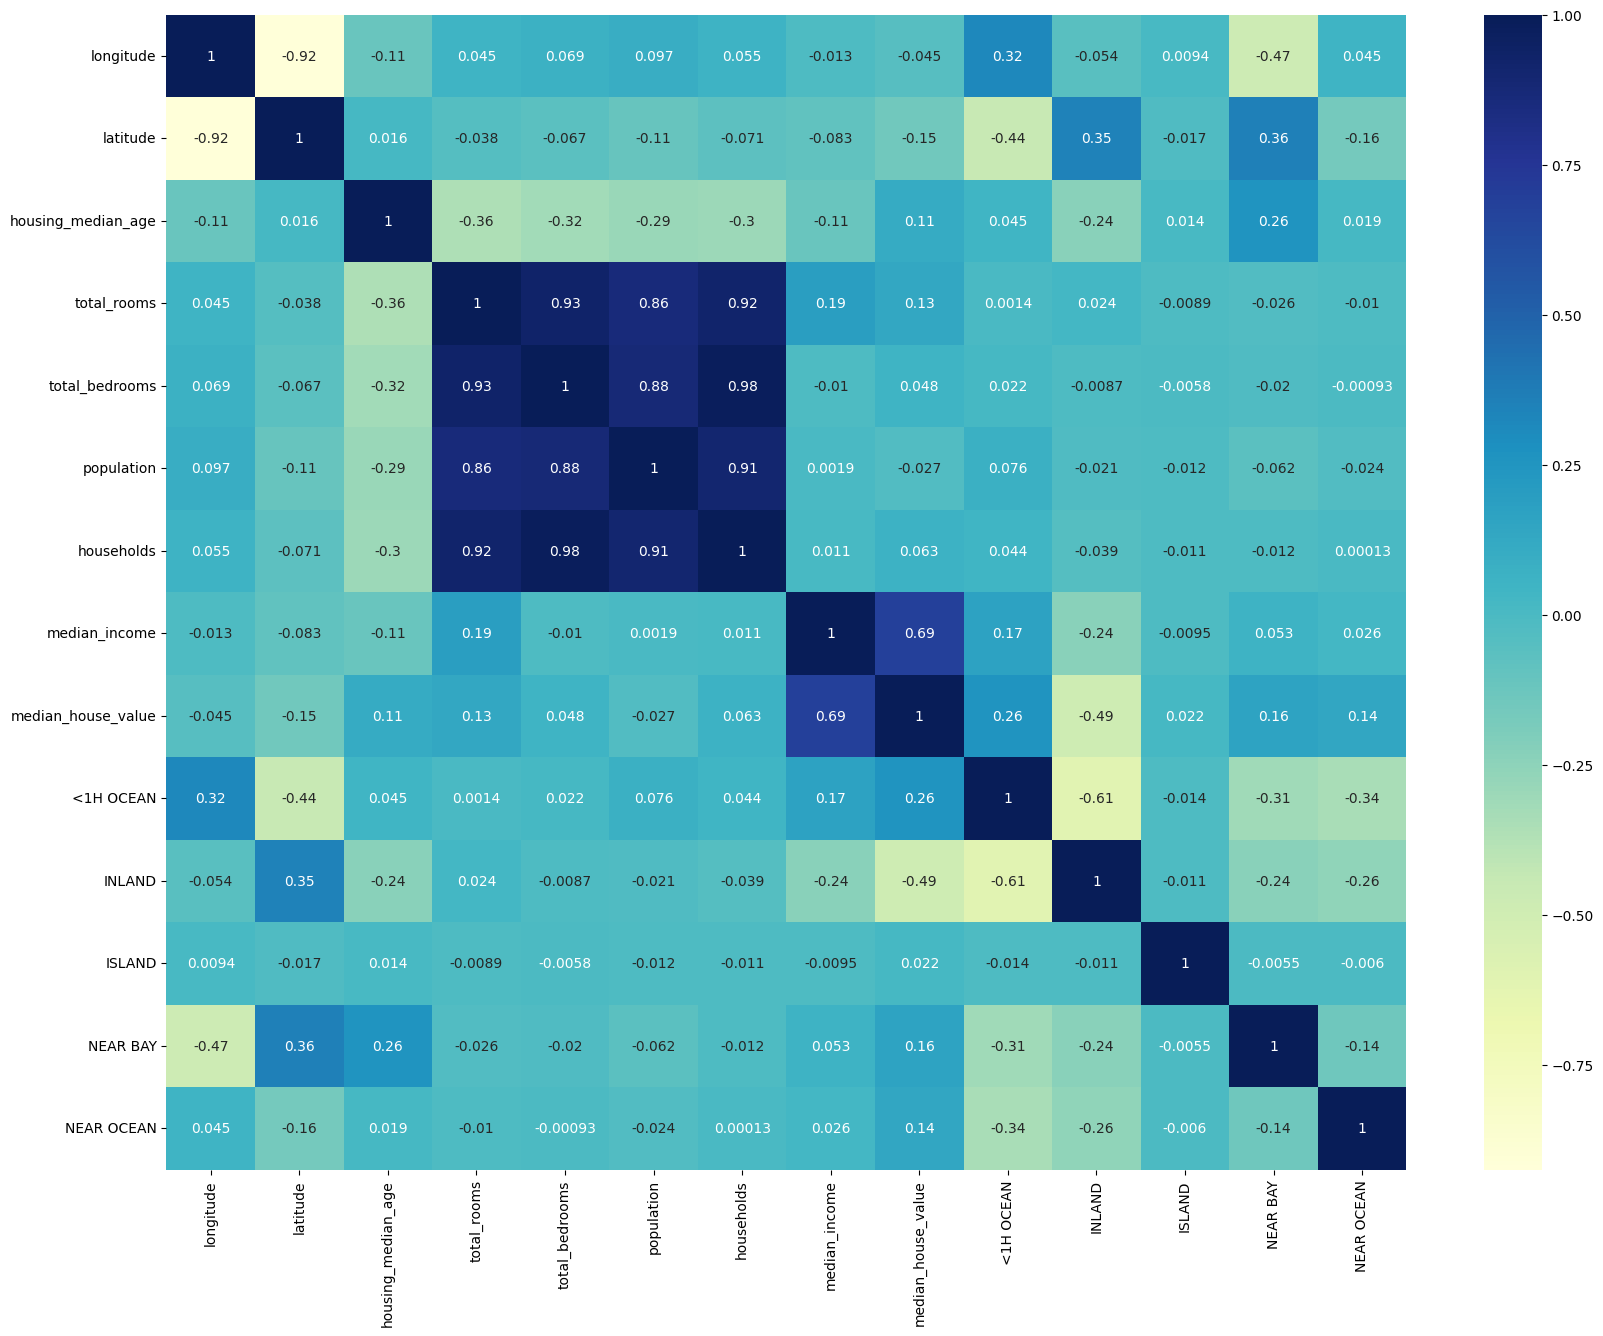

In [106]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [107]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

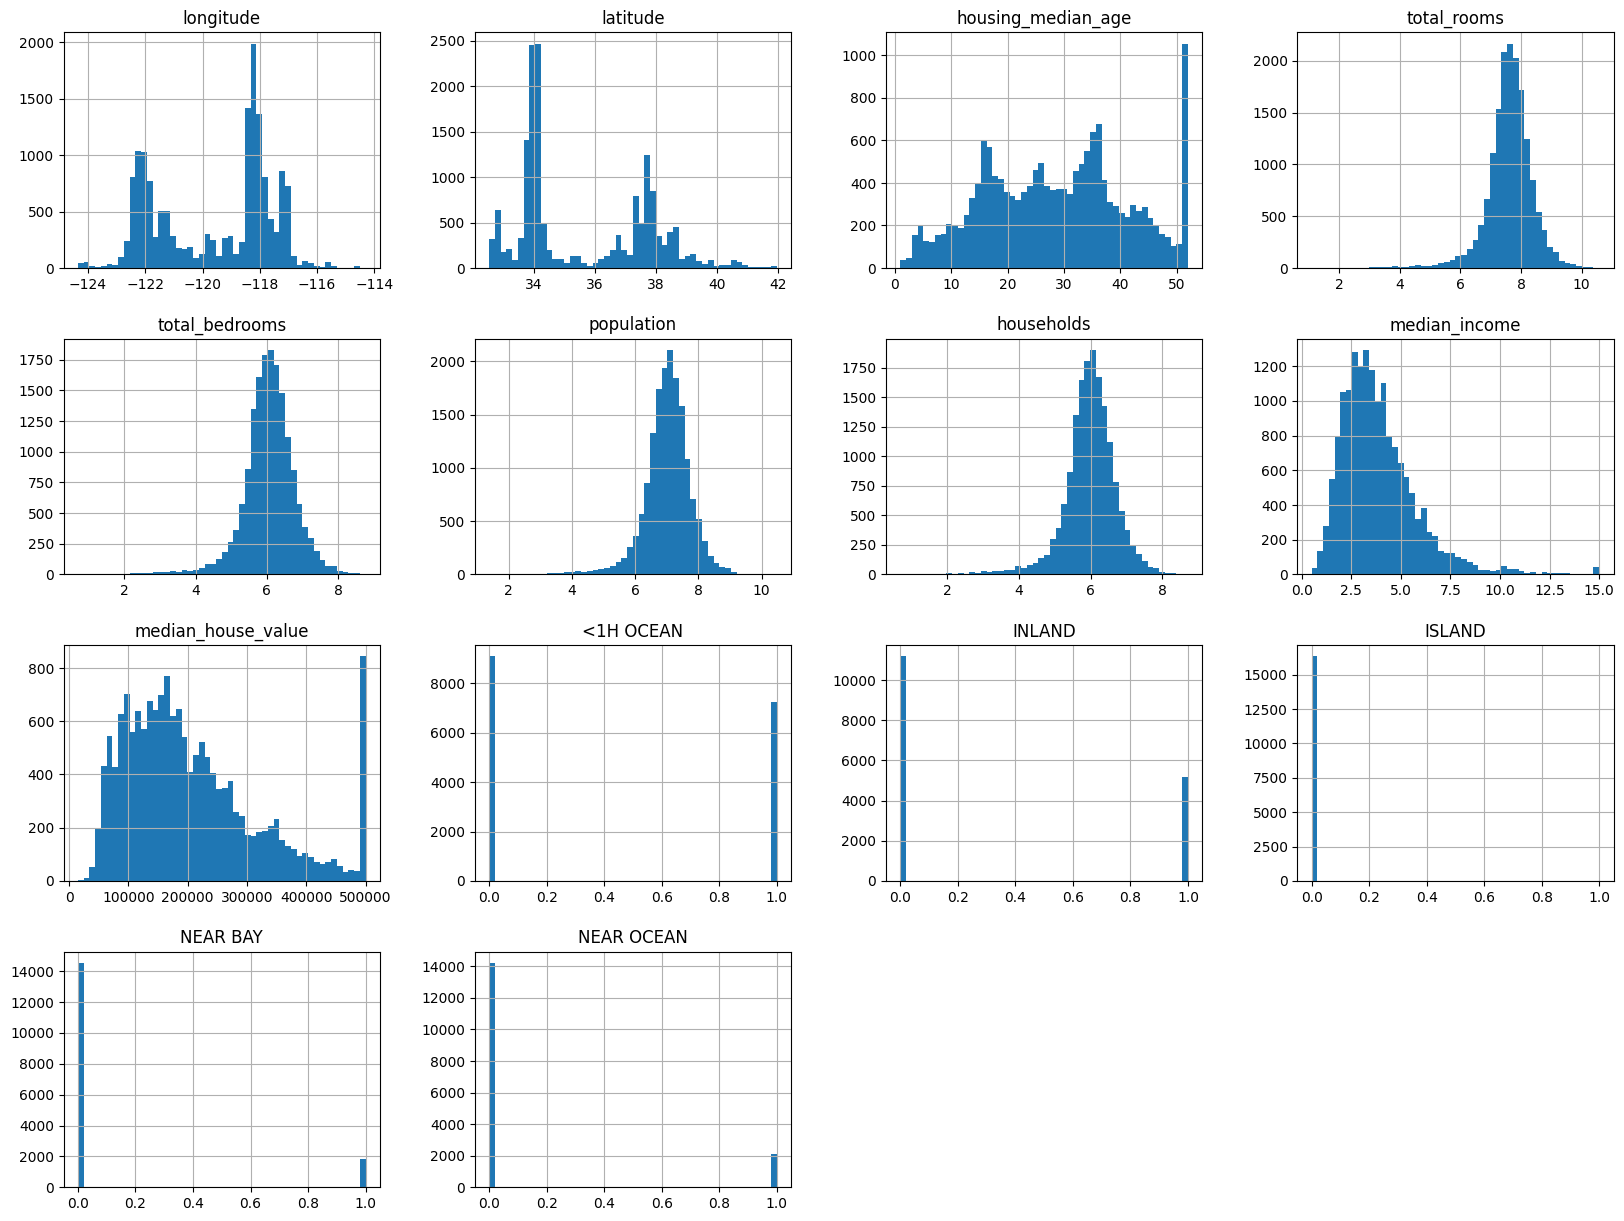

In [108]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

$\text{Visualize the Coordinate}$

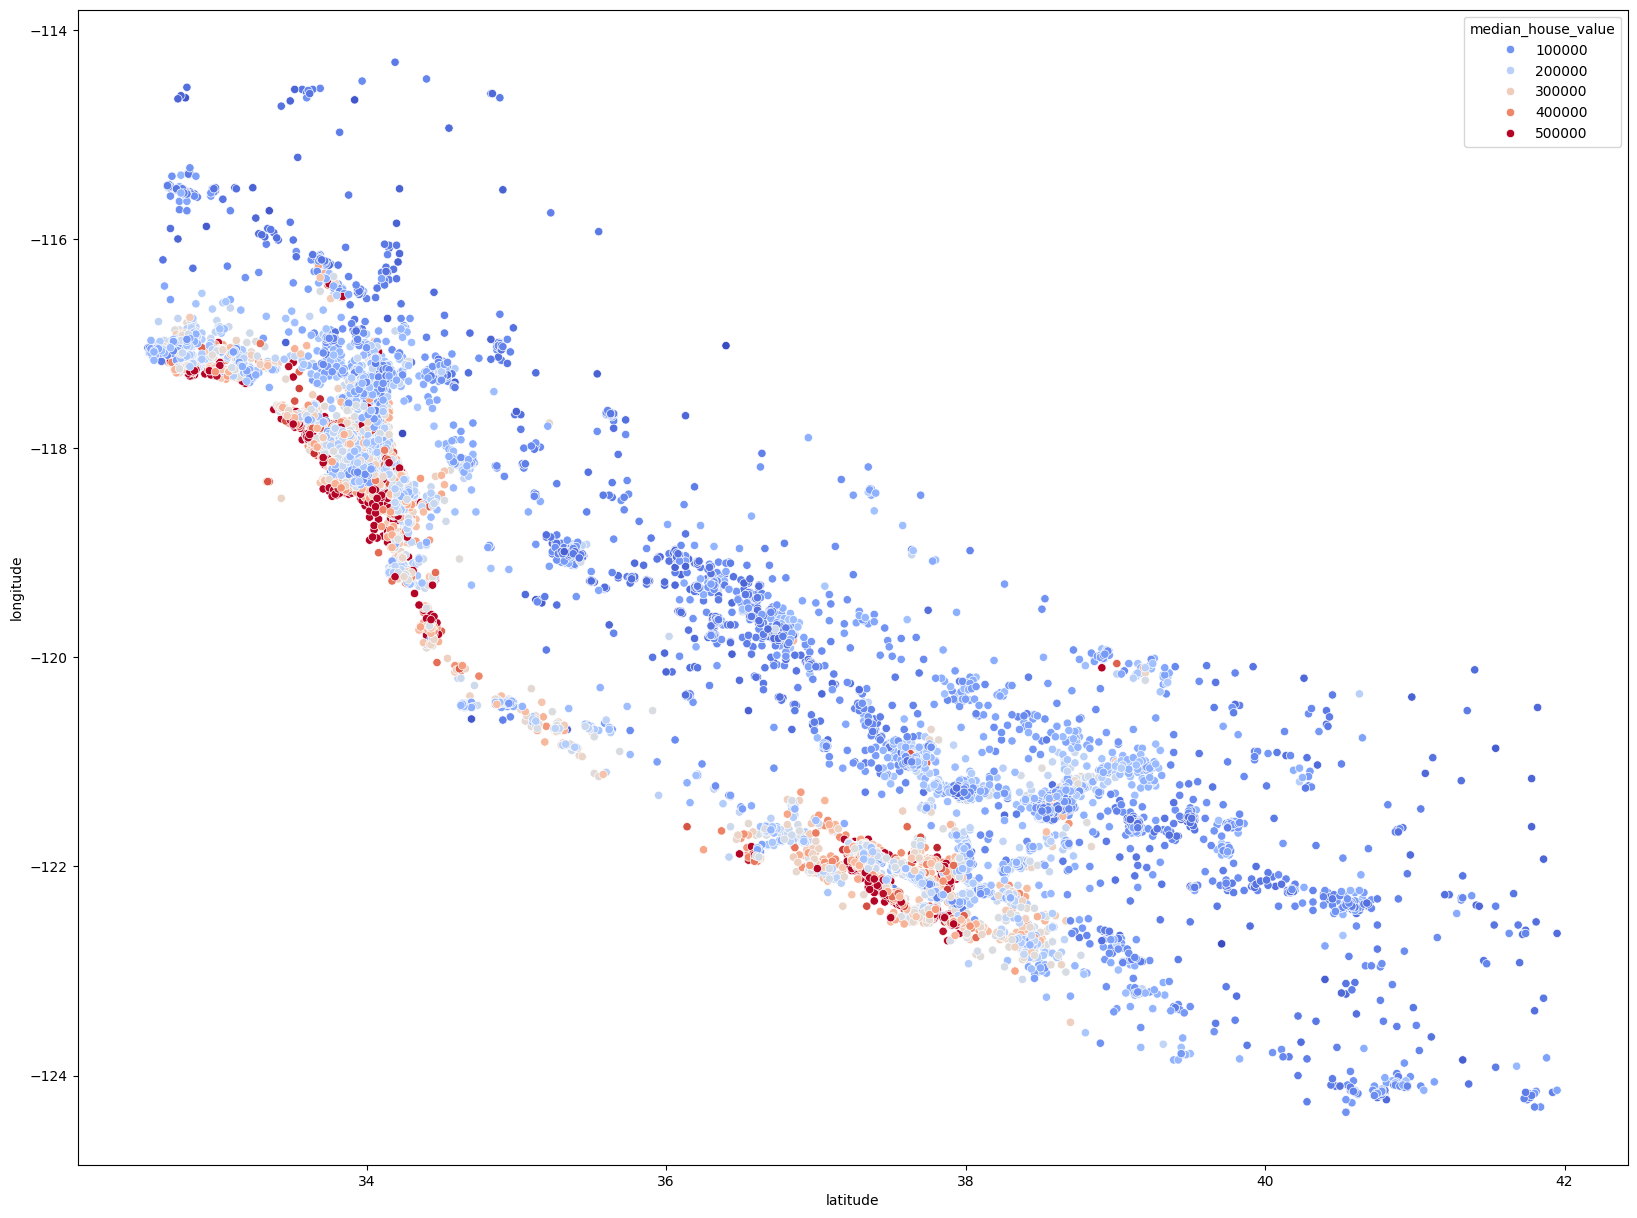

In [109]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette='coolwarm')
plt.show()

$\textbf{Do some Feature Engineer}$

In [110]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

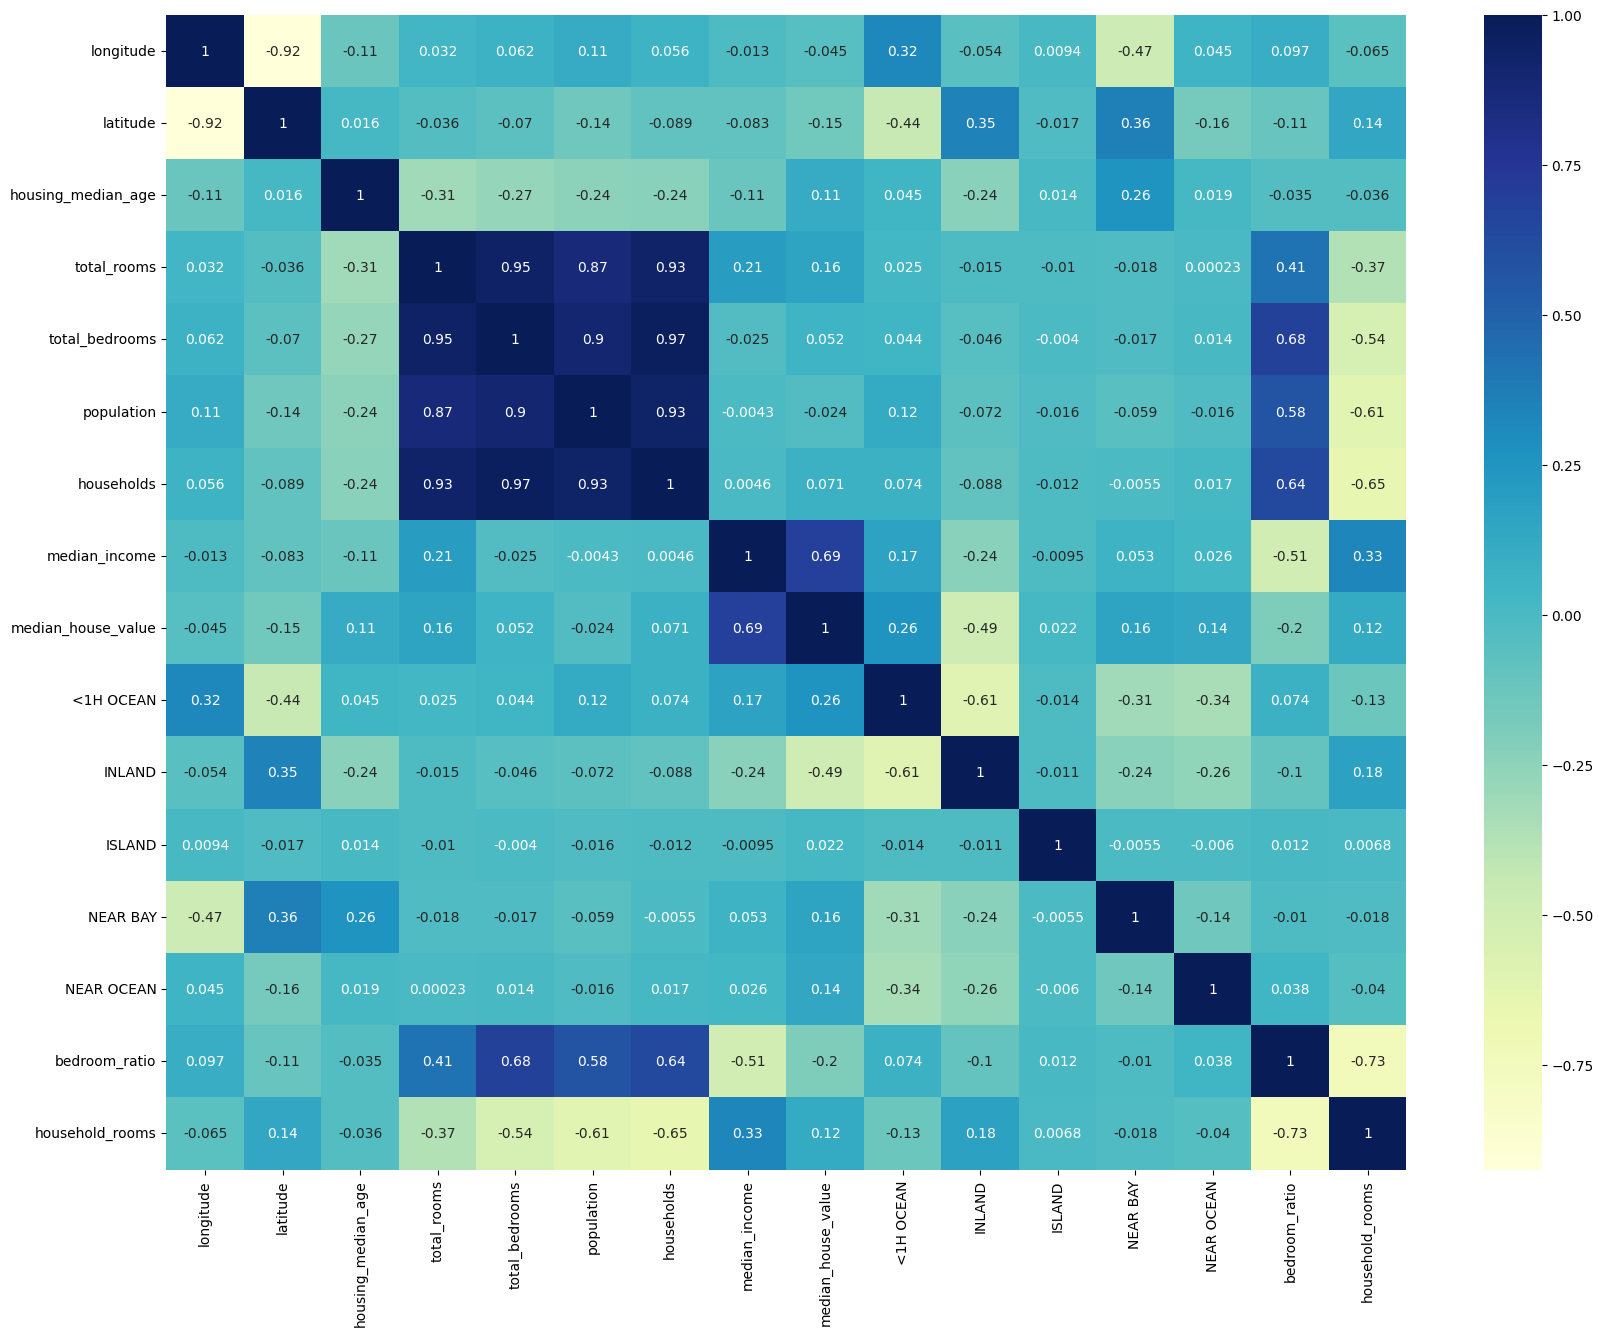

In [111]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [112]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [113]:
test_data = X_test.join(y_test)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop('ocean_proximity', axis=1)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [114]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
235,-122.20,37.79,35.0,7.497207,6.131226,6.917706,5.968708,2.3036,126000.0,0,0,0,1,0,0.817801,1.256086
20493,-118.65,34.27,23.0,7.452982,5.583496,6.840547,5.726848,6.0783,229200.0,1,0,0,0,0,0.749163,1.301411
9174,-118.52,34.39,21.0,8.608495,7.151485,8.127109,7.109062,3.6625,228100.0,1,0,0,0,0,0.830747,1.210919
1374,-122.12,38.01,50.0,7.170888,5.575949,6.539586,5.480639,3.9519,126500.0,0,0,0,1,0,0.777581,1.308404
9596,-120.45,37.31,20.0,8.384804,6.625392,7.628518,6.575076,3.7652,133500.0,0,1,0,0,0,0.790167,1.275241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12355,-116.54,33.80,22.0,8.707979,7.235619,7.267525,6.792344,2.2216,183900.0,0,1,0,0,0,0.830918,1.282028
5351,-118.40,34.04,40.0,7.640123,5.594711,6.580639,5.645447,9.2720,500001.0,1,0,0,0,0,0.732280,1.353325
11515,-118.09,33.71,19.0,7.242798,5.605802,6.198479,5.288267,8.7397,500001.0,0,0,0,0,1,0.773983,1.369598
16981,-122.29,37.56,34.0,7.434848,5.641907,6.741701,5.676754,5.3683,339400.0,0,0,0,1,0,0.758846,1.309701


In [115]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19359,-123.01,38.80,21.0,5.888878,4.574711,4.882802,4.317488,3.5156,133300.0,1,0,0,0,0,0.776839,1.363959
12271,-117.04,34.00,21.0,8.439232,6.748760,7.684784,6.700731,3.5255,132100.0,0,1,0,0,0,0.799689,1.259449
1001,-121.77,37.68,36.0,7.431300,5.921578,6.857514,5.921578,3.5532,158400.0,0,1,0,0,0,0.796843,1.254953
18896,-122.24,38.12,42.0,7.393878,5.545177,6.361302,5.497168,4.0114,166900.0,0,0,0,1,0,0.749969,1.345034
1738,-122.33,37.98,32.0,7.584773,5.855072,7.043160,5.899897,4.4135,150100.0,0,0,0,1,0,0.771951,1.285577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16284,-121.28,37.93,23.0,7.307873,5.849325,7.109879,5.840642,2.1591,67800.0,0,1,0,0,0,0.800414,1.251211
14410,-117.23,32.79,23.0,7.855157,6.501290,6.897705,6.434547,3.5484,238000.0,0,0,0,0,1,0.827646,1.220779
3690,-118.36,34.22,37.0,7.321850,5.855072,7.343426,5.863631,3.7663,160300.0,1,0,0,0,0,0.799671,1.248689
10788,-117.91,33.64,38.0,7.706613,6.297109,6.973543,6.240276,2.8553,307600.0,1,0,0,0,0,0.817105,1.234980


In [116]:
reg.score(X_test, y_test)

0.6503879238475063

$\text{If you want to get a better accuracy, you will want to scale the data.}$

$\textbf{I do not really think, Linear Regression is a good models for this prediction, I think Random Forest will achive more better and adaptable to the large Data Set}$

<Axes: xlabel='median_house_value', ylabel='median_house_value'>

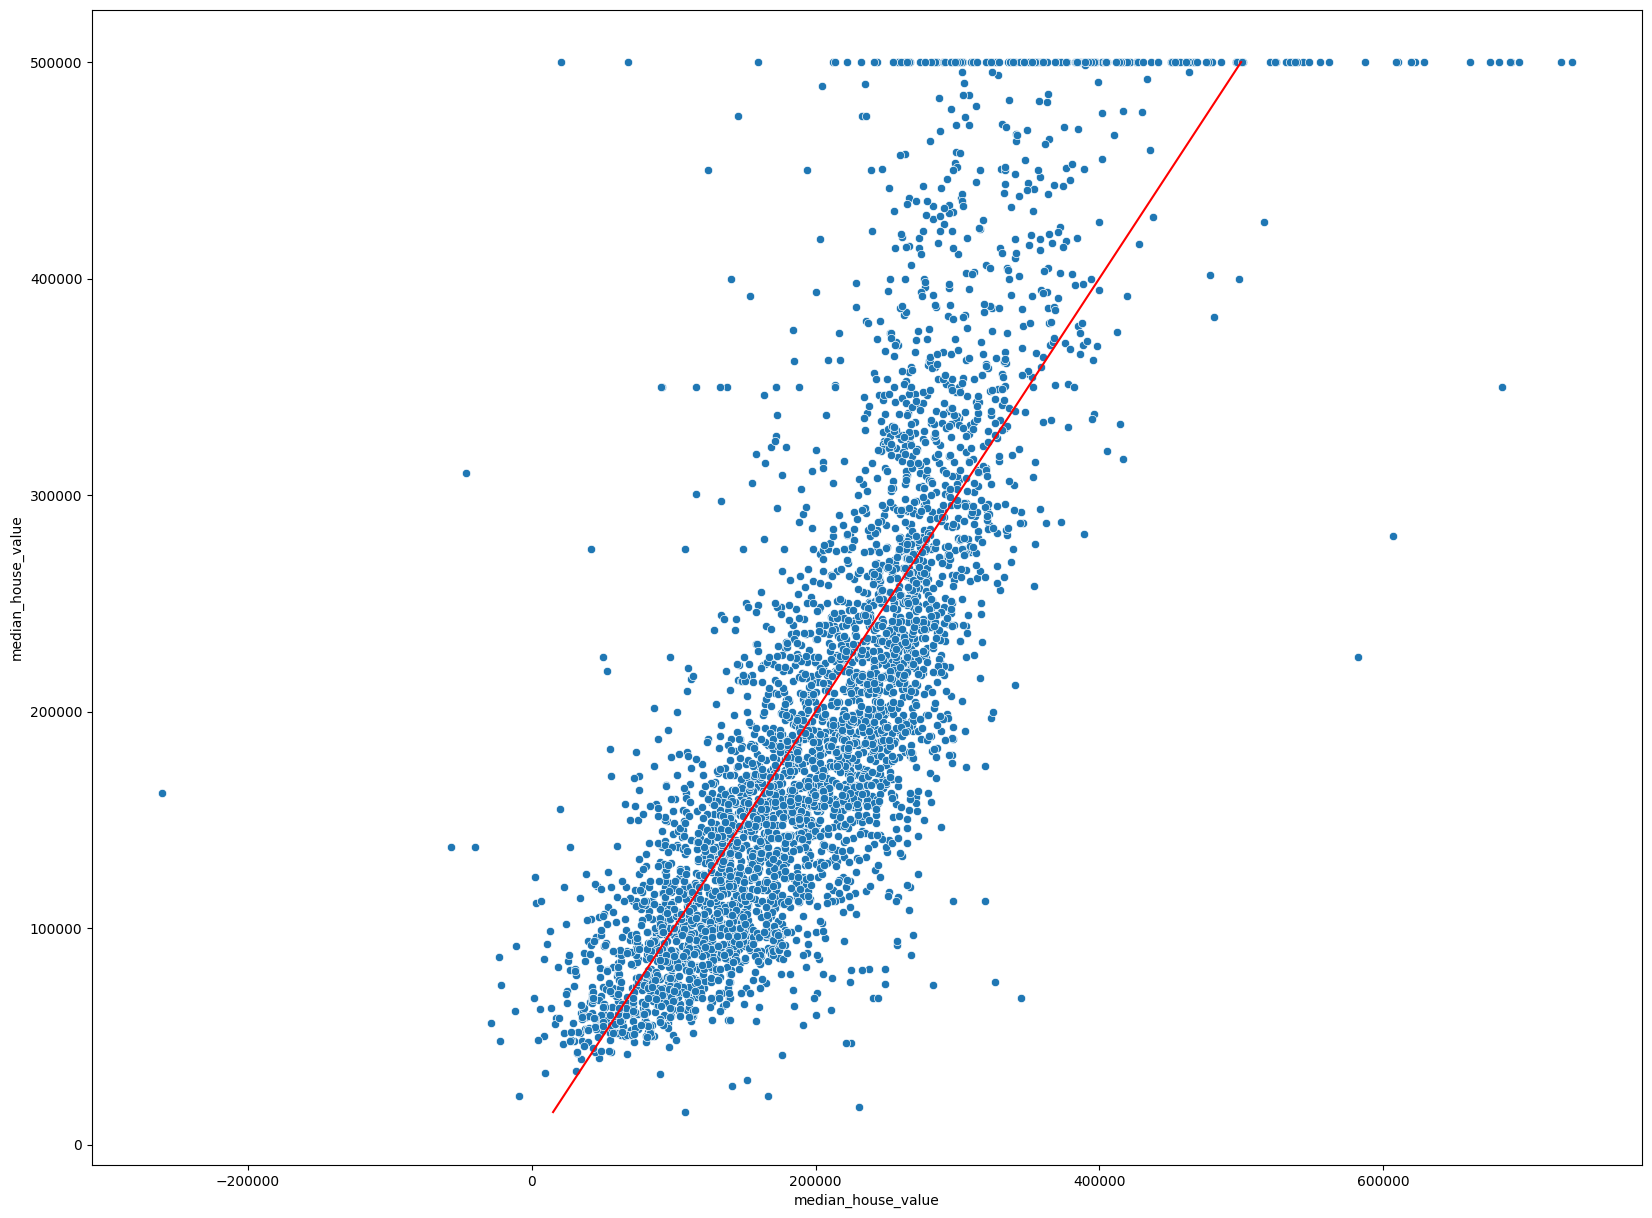

In [117]:
plt.figure(figsize=(20,15))
sns.scatterplot(x = reg.predict(X_test), y = y_test)
sns.lineplot(x = y_test, y = y_test, color='red')